# RLDatix Assesment

Predictive Modelling (Binary Classifica on) -	Perform	data	cleaning	and	exploratory	analysis	
-	Apply	feature	engineering:	e.g.	convert	categorical	variables	to	numerical,	handle	
imbalances,	derive	new	features	
-	Train	a	classi ication	model	(e.g.	logistic	regression,	random	forest,	XGBoost)	
-	Evaluate	using	ROC	AUC,	F1-score,	and	confusion	matrix	
-	Explain	which	features	were	most	inluential	

In [90]:
#load the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

import warnings
warnings.filterwarnings("ignore", "is_categorical_dtype")
warnings.filterwarnings("ignore", "use_inf_as_na")

In [91]:
#Read the data set
data = pd.read_csv("Assignment_Data.csv")

#Check the data
data.head()

,patient_id,age,gender,diagnosis_code,num_previous_admissions,medication_type,length_of_stay,readmitted_30_days,discharge_note
0,1,71,Male,D002,3,Type C,2,0,Good recovery trajectory. Follow-up scan sched...
1,2,34,Female,D002,1,Type B,3,1,Stable post-surgery. Advised to avoid physical...
2,3,80,Male,D002,2,Type C,5,1,Symptoms controlled. Monitoring for relapse ad...
3,4,40,Female,D002,2,Type C,11,0,Stable post-surgery. Advised to avoid physical...
4,5,43,Female,D001,1,Type C,8,1,Stable post-surgery. Advised to avoid physical...


In [92]:
#Check for non-null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   patient_id               200 non-null    int64 
 1   age                      200 non-null    int64 
 2   gender                   200 non-null    object
 3   diagnosis_code           200 non-null    object
 4   num_previous_admissions  200 non-null    int64 
 5   medication_type          200 non-null    object
 6   length_of_stay           200 non-null    int64 
 7   readmitted_30_days       200 non-null    int64 
 8   discharge_note           200 non-null    object
dtypes: int64(5), object(4)
memory usage: 14.2+ KB


# Data Preparation

In [93]:
data.Engine = data['discharge_note'].str.lower()

#Remove HTML tags
data.Engine = data.Engine.apply(lambda raw_text: BeautifulSoup(raw_text, "lxml").text)

# Remove the punctuations and special characters
data.Engine = data.Engine.str.replace(r'[^\w\s]', '', regex=True)

data.Engine = data.Engine.str.replace(r'[â,Ã,ã]', '', regex=True)

#Replace _ with a space to separate the words
data.Engine = data.Engine.str.replace('[_]', ' ', regex=True)

# Remove numbers
data.Engine = data.Engine.str.replace('[0-9]', '', regex=True)

# Remove the stopwords
stopw = stopwords.words('english') #English stop words from NLTK

data.Engine = data.Engine.apply(lambda x: ' '.join([word for word in x.split() if word not in stopw]))

#Check the tweets now
data.head()

C:\Users\inigw\AppData\Local\Temp\ipykernel_32172\1106162950.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  data.Engine = data['discharge_note'].str.lower()


,patient_id,age,gender,diagnosis_code,num_previous_admissions,medication_type,length_of_stay,readmitted_30_days,discharge_note
0,1,71,Male,D002,3,Type C,2,0,Good recovery trajectory. Follow-up scan sched...
1,2,34,Female,D002,1,Type B,3,1,Stable post-surgery. Advised to avoid physical...
2,3,80,Male,D002,2,Type C,5,1,Symptoms controlled. Monitoring for relapse ad...
3,4,40,Female,D002,2,Type C,11,0,Stable post-surgery. Advised to avoid physical...
4,5,43,Female,D001,1,Type C,8,1,Stable post-surgery. Advised to avoid physical...


In [94]:
#Check the unique values for categorical variables
data['patient_id'].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [95]:
data['age'].unique()

array([71, 34, 80, 40, 43, 22, 41, 72, 21, 49, 57, 83, 79, 52, 77, 68, 78,
       61, 81, 66, 70, 74, 26, 58, 37, 23, 33, 28, 63, 27, 54, 55, 69, 25,
       73, 82, 53, 67, 59, 45, 60, 48, 64, 84, 20, 30, 24, 47, 31, 42, 56,
       46, 62, 32, 51, 85, 76, 89, 75, 38, 87, 36, 88, 35, 39, 86, 50],
      dtype=int64)

In [96]:
data['gender'].unique()

array(['Male', 'Female'], dtype=object)

In [97]:
data['diagnosis_code'].unique()

array(['D002', 'D001', 'D004', 'D003'], dtype=object)

In [98]:
data['num_previous_admissions'].unique()

array([3, 1, 2, 0, 4, 5, 6], dtype=int64)

In [99]:
data['medication_type'].unique()

array(['Type C', 'Type B', 'Type A'], dtype=object)

In [100]:
data['length_of_stay'].unique()

array([ 2,  3,  5, 11,  8, 10,  7, 12,  1,  4, 13,  6,  9, 14],
      dtype=int64)

In [101]:
data['readmitted_30_days'].unique()

array([0, 1], dtype=int64)

# Exploratory Data Analysis

In [105]:
print(data.head(10))

   patient_id  age  gender diagnosis_code  num_previous_admissions  \
0           1   71    Male           D002                        3   
1           2   34  Female           D002                        1   
2           3   80    Male           D002                        2   
3           4   40  Female           D002                        2   
4           5   43  Female           D001                        1   
5           6   22  Female           D004                        1   
6           7   41    Male           D002                        1   
7           8   72    Male           D002                        0   
8           9   21  Female           D003                        4   
9          10   49    Male           D002                        2   

  medication_type  length_of_stay  readmitted_30_days  \
0          Type C               2                   0   
1          Type B               3                   1   
2          Type C               5                   1   
3

In [106]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   patient_id               200 non-null    int64 
 1   age                      200 non-null    int64 
 2   gender                   200 non-null    object
 3   diagnosis_code           200 non-null    object
 4   num_previous_admissions  200 non-null    int64 
 5   medication_type          200 non-null    object
 6   length_of_stay           200 non-null    int64 
 7   readmitted_30_days       200 non-null    int64 
 8   discharge_note           200 non-null    object
dtypes: int64(5), object(4)
memory usage: 14.2+ KB
None


In [107]:
print(data.describe())

       patient_id         age  num_previous_admissions  length_of_stay  \
count  200.000000  200.000000               200.000000      200.000000   
mean   100.500000   53.720000                 1.600000        7.865000   
std     57.879185   21.294574                 1.310951        4.134276   
min      1.000000   20.000000                 0.000000        1.000000   
25%     50.750000   34.000000                 1.000000        4.000000   
50%    100.500000   54.000000                 1.000000        8.000000   
75%    150.250000   73.000000                 2.000000       11.000000   
max    200.000000   89.000000                 6.000000       14.000000   

       readmitted_30_days  
count           200.00000  
mean              0.32500  
std               0.46955  
min               0.00000  
25%               0.00000  
50%               0.00000  
75%               1.00000  
max               1.00000  


In [108]:
data.isnull().sum()

patient_id                 0
age                        0
gender                     0
diagnosis_code             0
num_previous_admissions    0
medication_type            0
length_of_stay             0
readmitted_30_days         0
discharge_note             0
dtype: int64

<Axes: xlabel='gender'>

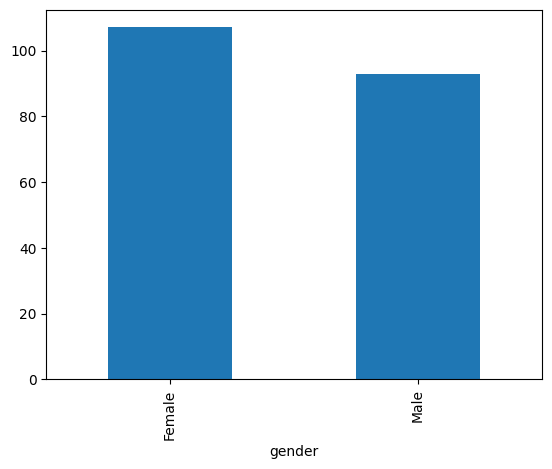

In [109]:
(data['gender'].value_counts().plot(kind='bar'))

<Axes: xlabel='num_previous_admissions'>

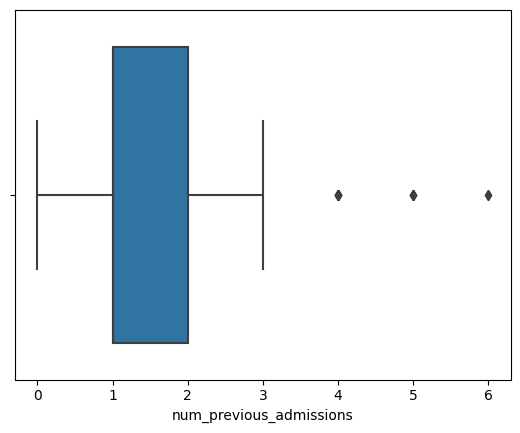

In [110]:
import matplotlib.pyplot as plt
sns.boxplot(x=data['num_previous_admissions'])

<Axes: xlabel='age'>

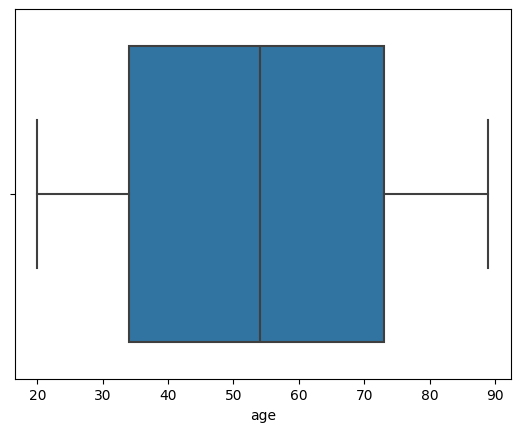

In [111]:
sns.boxplot(x=data['age'])

<Axes: xlabel='diagnosis_code'>

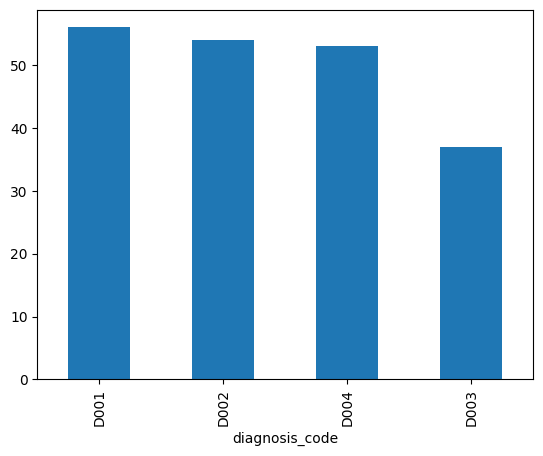

In [112]:
(data['diagnosis_code'].value_counts().plot(kind='bar'))

<Axes: xlabel='medication_type'>

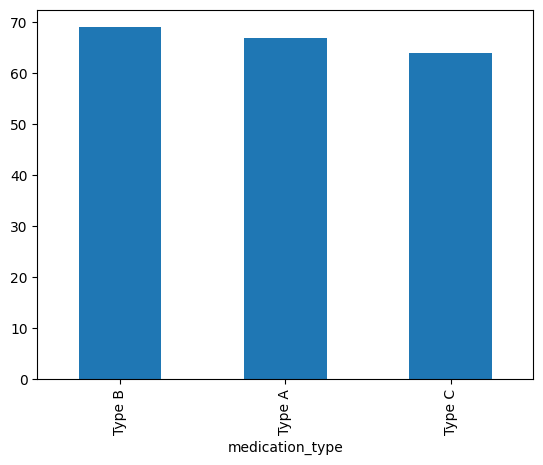

In [113]:
# data

(data['medication_type'].value_counts().plot(kind='bar'))

<Axes: xlabel='length_of_stay'>

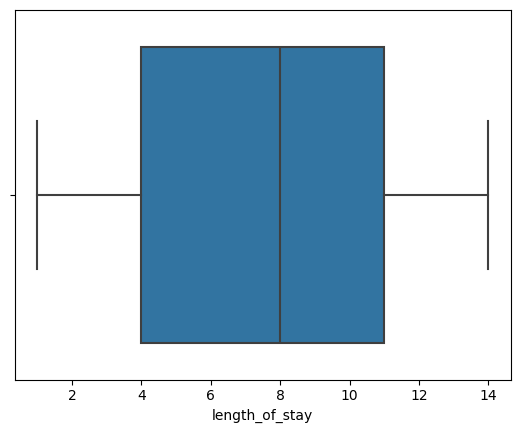

In [114]:

sns.boxplot(x=data['length_of_stay'])

In [ ]:
x1 = np.arange(0,1,0.01)
x2 = (5*(x1**3)-2*(x1**2)+x1)/4

In [116]:
X = data[['length_of_stay', 'num_previous_admissions']]
y = data.medication_type

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

model = KNeighborsClassifier(n_neighbors = 1)
model.fit(X,y)
ypred = model.predict(X)
print('Accuracy:', accuracy_score(y, ypred))

Accuracy: 0.6


In [117]:
z1 = np.arange(0, 1.01,0.01)
Z1,Z2 = np.meshgrid(z1,z1)
Z = pd.DataFrame({'length_of_stay': Z1.reshape(-1), 'num_previous_admissions':Z2.reshape(-1)})

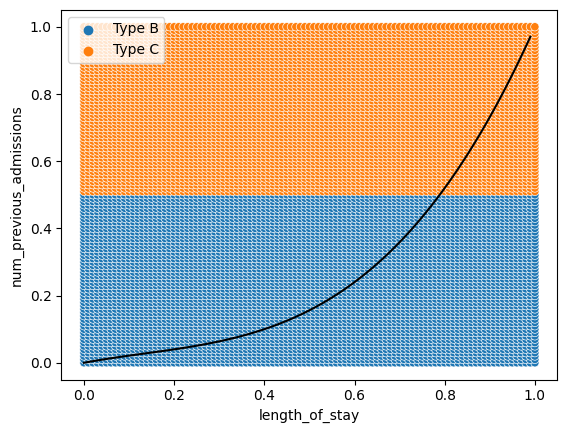

In [120]:
model = KNeighborsClassifier(n_neighbors = 1)
model.fit(X,y)
yz = model.predict(Z)

sns.scatterplot(data=Z, x='length_of_stay', y='num_previous_admissions', hue=yz)
plt.plot(x1,x2,c='black')
plt.xlabel('length_of_stay')
plt.ylabel('num_previous_admissions')
plt.show()

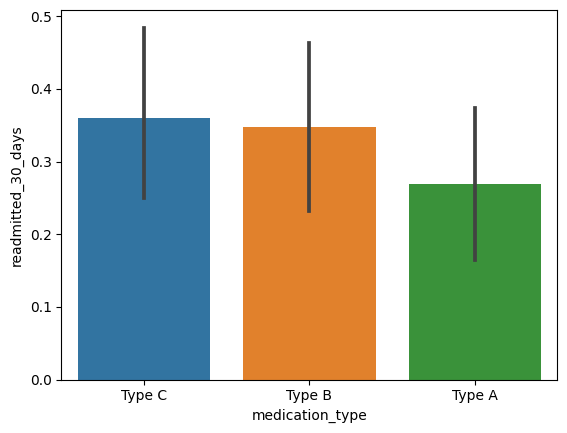

In [ ]:
sns.barplot(data=data, x='medication_type', y='readmitted_30_days')
plt.show()

In [ ]:
data.columns

Index(['patient_id', 'age', 'gender', 'diagnosis_code',
       'num_previous_admissions', 'medication_type', 'length_of_stay',
       'readmitted_30_days', 'discharge_note'],
      dtype='object')

In [ ]:
dataAll=data

Categorize and Scale the data

In [ ]:
from sklearn.preprocessing import MinMaxScaler
# Consider the following categorical features
cat_feat = ['gender', 'diagnosis_code','medication_type']

#Consider the following numerical features
num_feat = ['age','num_previous_admissions','length_of_stay','readmitted_30_days']

# Create dummy variables for categorical features
X_cat = pd.get_dummies(data[cat_feat], drop_first=True)

# Separate the numerical features
X_num = data[num_feat]

# Scale the features
scaler = MinMaxScaler()
X_num = pd.DataFrame(scaler.fit_transform(X_num), columns=num_feat)

#Merge them together

Xdata = pd.concat([X_num, X_cat], axis=1)

#Check the shape
print(Xdata.shape)

(200, 10)


In [ ]:
Xdata.columns

Index(['age', 'num_previous_admissions', 'length_of_stay',
       'readmitted_30_days', 'gender_Male', 'diagnosis_code_D002',
       'diagnosis_code_D003', 'diagnosis_code_D004', 'medication_type_Type B',
       'medication_type_Type C'],
      dtype='object')

Transform and Split the data for training and testing 

In [ ]:
#Separate X and y

X = Xdata[['age', 'num_previous_admissions', 'length_of_stay', 'gender_Male', 'diagnosis_code_D002',
       'diagnosis_code_D003', 'diagnosis_code_D004', 'medication_type_Type B','medication_type_Type C']]
y = Xdata['readmitted_30_days']

In [ ]:
#Split the training and the test data
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X,y, test_size=0.2, random_state=42)


In [ ]:
print('No of obervations in the training set:', Xtrain.shape[0])
print('No of obervations in the test set:', Xtest.shape[0])

No of obervations in the training set: 160
No of obervations in the test set: 40


In [ ]:
#Scale the X variables
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(Xtrain)

#Scale the training data
X_tr_scaled = scaler.transform(Xtrain)

#Scale the test data
X_te_scaled = scaler.transform(Xtest)

## Run Model: RandomForests

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report


# define the model

rf_model = RandomForestClassifier(n_estimators=100, max_features=2, random_state=21)
rf_model.fit(X_tr_scaled, ytrain)

#Predict the response for test dataset
y_te_pr = rf_model.predict(X_te_scaled)

print(classification_report(ytest, y_te_pr))

              precision    recall  f1-score   support

         0.0       0.70      0.93      0.80        28
         1.0       0.33      0.08      0.13        12

    accuracy                           0.68        40
   macro avg       0.52      0.51      0.47        40
weighted avg       0.59      0.68      0.60        40



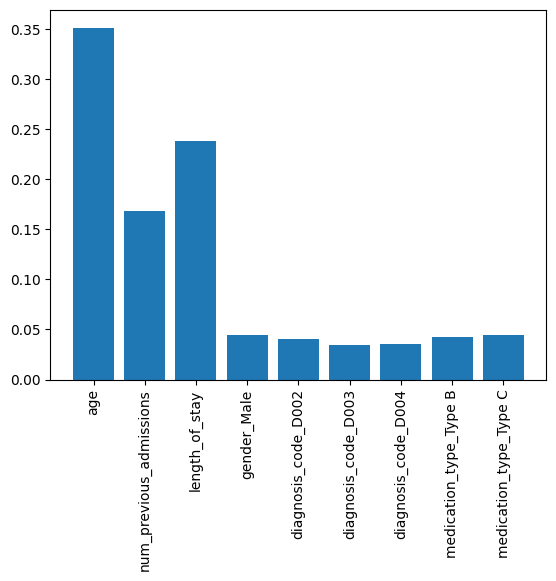

In [ ]:
importance = rf_model.feature_importances_

plt.bar(X.columns, importance)
plt.xticks(rotation=90)
plt.show()

# Evaluate Model Outcome

Confusion Matrix

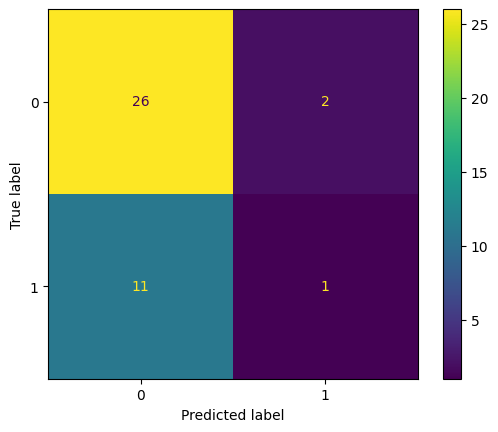

In [ ]:
#Visualise the confusion matrix
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

cnf_matrix = confusion_matrix(ytest, y_te_pr)

#Create a heat map to visualize
disp = ConfusionMatrixDisplay(cnf_matrix)
disp.plot()
plt.show()

The model performs well on class 0 but struggles heavily with class 1.

This is a classic class imbalance problem or bias toward the majority class.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# define the model

rf_model = RandomForestClassifier(n_estimators=100, max_depth=15, random_state=21)
rf_model.fit(X, y)

RandomForestClassifier(max_depth=15, random_state=21)

In [ ]:
from sklearn.model_selection import cross_val_score
cv = 5 #5-fold cross-validation

tree_depths = np.arange(1,15)

cv_scores_mean = []
cv_scores_std = []
accuracy_scores = []
for depth in tree_depths:
    tree_model = DecisionTreeClassifier(max_depth=depth)
    cv_scores = cross_val_score(tree_model, Xtrain, ytrain, cv=cv, scoring='accuracy')
    cv_scores_mean.append(cv_scores.mean())
    cv_scores_std.append(cv_scores.std())
    accuracy_scores.append(tree_model.fit(Xtrain, ytrain).score(Xtrain, ytrain))
cv_scores_mean = np.array(cv_scores_mean)
cv_scores_std = np.array(cv_scores_std)
accuracy_scores = np.array(accuracy_scores)

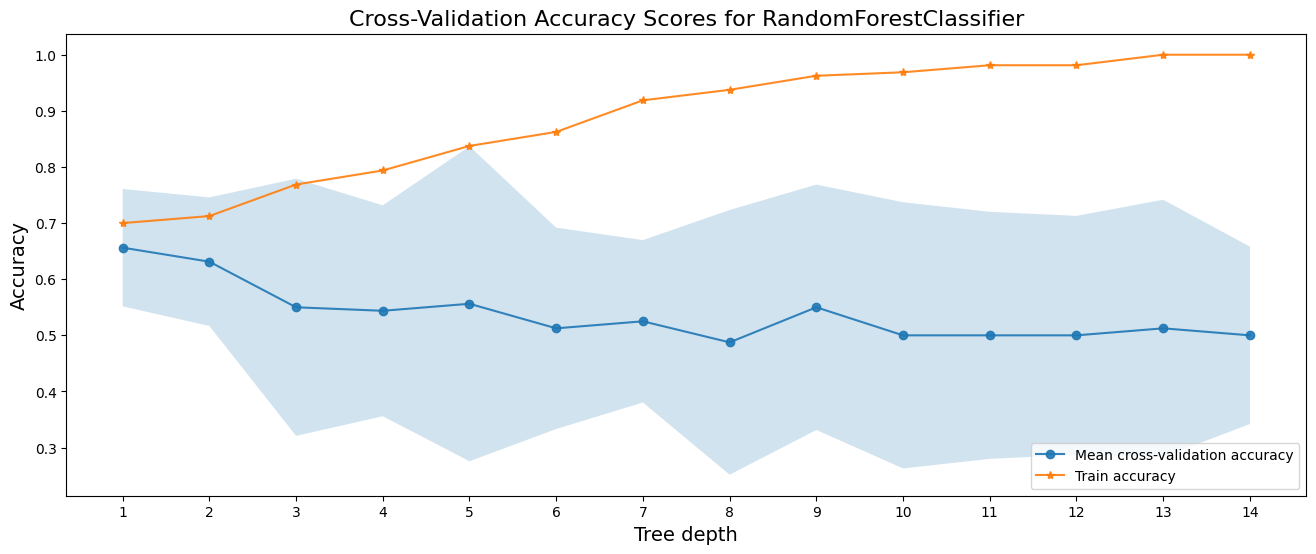

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(16,6))
ax.plot(tree_depths, cv_scores_mean, '-o', label='Mean cross-validation accuracy', alpha=0.9)
ax.fill_between(tree_depths, cv_scores_mean-2*cv_scores_std, cv_scores_mean+2*cv_scores_std, alpha=0.2)
#ylim = plt.ylim()
ax.plot(tree_depths, accuracy_scores, '-*', label='Train accuracy', alpha=0.9)
ax.set_title('Cross-Validation Accuracy Scores for RandomForestClassifier', fontsize=16)
ax.set_xlabel('Tree depth', fontsize=14)
ax.set_ylabel('Accuracy', fontsize=14)
#ax.set_ylim(ylim)
ax.set_xticks(tree_depths)
ax.legend(loc='lower right')
plt.show()

Orange line (Train accuracy): Accuracy of the model on the training data.

Blue line (Mean cross-validation accuracy): Average performance on unseen data across folds during cross-validation.

Blue shaded area: Likely represents the standard deviation or confidence interval around the mean cross-validation accuracy.

After a tree depth of ~5 or 6, the training accuracy keeps improving, but the validation accuracy stagnates or worsens. This indicates overfitting 



### ROC Curves
ROC curve is a plot of the true positive rate (TPR) against 
the false positive rate (FPR). 
It shows the trade-off between sensitivity and specificity.

To compute the ROC curves, we need the predicted probabilities 
from the fitted logistic regression models instead of predicted classes.


The model has high specificity (good at classifying 0s).

It has poor sensitivity (very bad at detecting 1s).

c:\Users\inigw\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


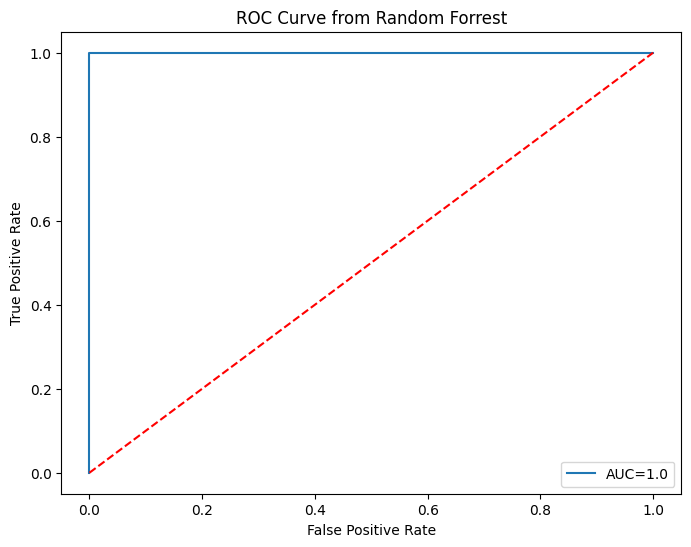

In [ ]:
from sklearn import metrics

y_te_prob = rf_model.predict_proba(X_te_scaled)[::,1]
fpr, tpr, _ = metrics.roc_curve(ytest,  y_te_prob)
auc = metrics.roc_auc_score(ytest, y_te_prob)

plt.figure(figsize=(8,6))
plt.plot(fpr,tpr,label="AUC="+str(np.round(auc,4)))
plt.plot([0,1], [0,1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve from Random Forrest')
plt.legend(loc=4)
plt.show()

In [ ]:
#Using GridSearchCV
from sklearn.model_selection import GridSearchCV

parameters = {'n_estimators':[10, 25, 50, 100], 'max_depth':[1, 2, 3,  5,10, 15, 20]}

rf_model = RandomForestClassifier(random_state=0)

clf = GridSearchCV(rf_model, parameters, cv=5, scoring='roc_auc')
clf.fit(Xtrain, ytrain)

print(clf.best_params_)

print(clf.best_score_)

{'max_depth': 1, 'n_estimators': 100}
0.559004329004329


The ROC curve evaluates the model as follows:

The model never makes a false positive or false negative in your the  set.

While this is ideal, it’s also unrealistic in real-world data.

This may be as a result of Overfitting (the model may have memorized training data).

Data leakage (information from the target variable unintentionally included in training) is also a concern



F1 Score

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(ytest, y_te_pr))

              precision    recall  f1-score   support

         0.0       0.70      0.93      0.80        28
         1.0       0.33      0.08      0.13        12

    accuracy                           0.68        40
   macro avg       0.52      0.51      0.47        40
weighted avg       0.59      0.68      0.60        40



Class 0 :
Very strong performance with 93% recall (almost all true class 0s are correctly identified).

High F1-score (0.80) indicates a well-balanced performance between precision and recall for class 0.
______________________________________________________________________________________________________

Class 1 :
Very weak performance:

Precision: 33% → When it predicts class 1, it's correct only 1 out of 3 times.

Recall: 8% → The model is missing 92% of actual class 1 examples.

F1-score: Extremely low (0.13), suggesting the model fails to capture class 1 instances.